In [2]:
#IMPORTING DATA

In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set_theme()

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv("churn-bigml-80.csv")

In [6]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [8]:
#EXPLORATORY DATA ANALYSIS

In [9]:
# Info of numerical data
data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [10]:
df = data['Churn'].loc[data['Churn']==True]
df.count()

# 388 out of 2666; "churn" == True

388

In [11]:
#SELECTING NUMERICAL COLUMNS AND DROPPING CATEGORICAL

In [12]:
data_num = data.select_dtypes(include=["float64","int64"])
data_num

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,79,415,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2
2662,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
2663,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
2664,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2


In [13]:
# drop "Area code" column which is categorical

data_int = data_num.drop(columns = ['Area code'])
data_int

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,79,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2
2662,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
2663,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
2664,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2


In [14]:
col = pd.DataFrame(data[['Total day minutes' , 'Total eve minutes' , 'Total intl minutes', "Customer service calls"]])
col

,Total day minutes,Total eve minutes,Total intl minutes,Customer service calls
0,265.1,197.4,10.0,1
1,161.6,195.5,13.7,1
2,243.4,121.2,12.2,0
3,299.4,61.9,6.6,2
4,166.7,148.3,10.1,3
...,...,...,...,...
2661,134.7,189.7,11.8,2
2662,156.2,215.5,9.9,2
2663,231.1,153.4,9.6,3
2664,180.8,288.8,14.1,2


In [15]:
churn = pd.DataFrame(data['Churn'])

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [17]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(col, churn, test_size = 0.25, random_state= 0)

In [18]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [19]:
#EVALUATING THE MODEL

In [20]:
classification_tree_train_accuracy = tree.score(X_train, y_train)
print("Training set accuracy: {:.4f}".format(classification_tree_train_accuracy))

Training set accuracy: 1.0000


In [21]:
classification_tree_test_accuracy = tree.score(X_test, y_test)
print("Test set accuracy: {:.4f}".format(classification_tree_test_accuracy))

Test set accuracy: 0.8441


<Axes: >

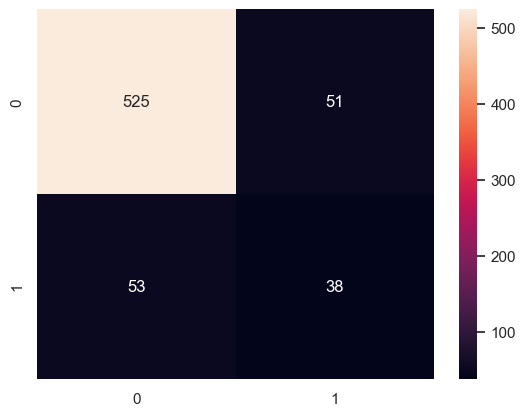

In [22]:
y_prediction = tree.predict(X_test)
sb.heatmap(confusion_matrix(y_test, y_prediction), annot=True, fmt="d")

In [23]:
TN, FP, FN, TP = confusion_matrix(y_test, y_prediction).ravel()
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)
print("True Positive Rate: {:.4f}".format(TPR))
print("True Negative Rate: {:.4f}".format(TNR))
print("False Positive Rate: {:.4f}".format(FPR))
print("False Negative Rate: {:.4f}".format(FNR))

True Positive Rate: 0.4176
True Negative Rate: 0.9115
False Positive Rate: 0.0885
False Negative Rate: 0.5824


In [24]:
#VISUALIZING AND ANALYZING THE MODEL

In [25]:
#we will print out the number of datapoints in each sets to verify it

print("Train set\t:{0},{1}".format(X_train.shape,y_train.shape))
print("Test set\t:{0},{1}".format(X_test.shape,y_test.shape))

Train set	:(1999, 4),(1999, 1)
Test set	:(667, 4),(667, 1)


In [27]:
trainDF = pd.concat([X_train,y_train], axis = 1).reindex(X_train.index)

In [28]:
trainDF.head()

,Total day minutes,Total eve minutes,Total intl minutes,Customer service calls,Churn
1127,112.6,261.7,11.1,0,True
286,220.1,234.3,10.1,4,False
2296,142.5,176.1,8.2,2,False
40,187.0,134.6,7.4,2,False
1901,222.1,199.4,9.4,2,False


<Axes: xlabel='Total day minutes', ylabel='Churn'>

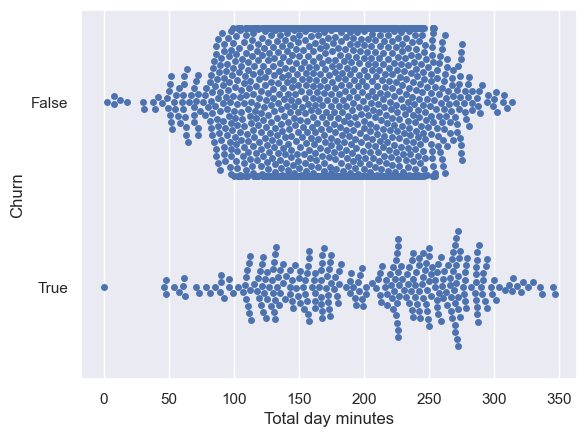

In [30]:
sb.swarmplot(x = trainDF["Total day minutes"], y = trainDF["Churn"], data = trainDF, orient = "h")


<Axes: xlabel='Total eve minutes', ylabel='Churn'>

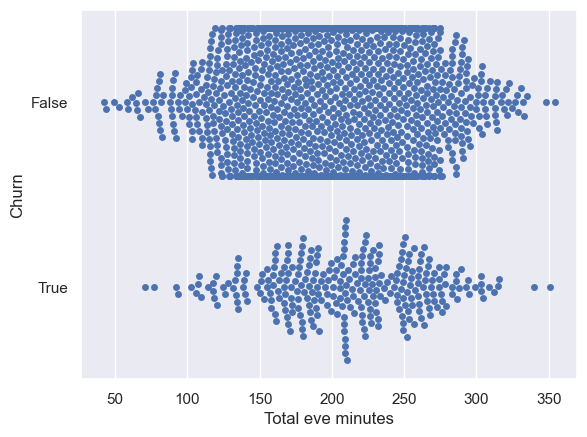

In [32]:
sb.swarmplot(x = trainDF["Total eve minutes"], y = trainDF["Churn"], data = trainDF, orient = "h")


<Axes: xlabel='Total intl minutes', ylabel='Churn'>

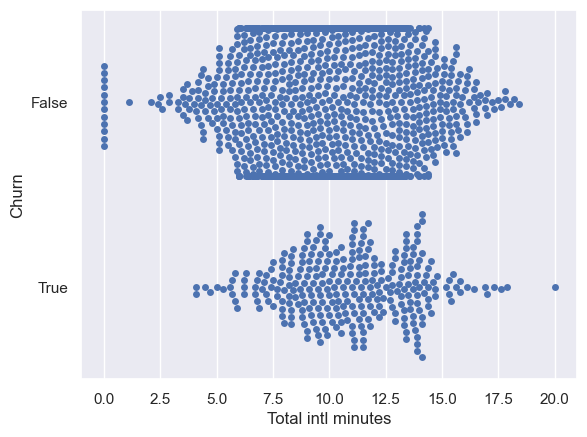

In [33]:
sb.swarmplot(x = trainDF["Total intl minutes"], y = trainDF["Churn"], data = trainDF, orient = "h")


<Axes: xlabel='Customer service calls', ylabel='Churn'>

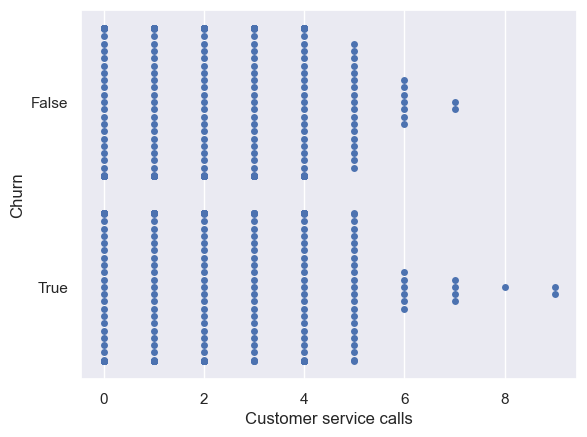

In [34]:
sb.swarmplot(x = trainDF["Customer service calls"], y = trainDF["Churn"], data = trainDF, orient = "h")


In [38]:
tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'Customer service calls <= 3.5\ngini = 0.253\nsamples = 1999\nvalue = [1702, 297]\nclass = No churn'),
 Text(0.25, 0.625, 'Total day minutes <= 247.45\ngini = 0.204\nsamples = 1844\nvalue = [1631, 213]\nclass = No churn'),
 Text(0.125, 0.375, 'Total intl minutes <= 13.45\ngini = 0.134\nsamples = 1640\nvalue = [1522, 118]\nclass = No churn'),
 Text(0.0625, 0.125, 'gini = 0.101\nsamples = 1455\nvalue = [1377, 78]\nclass = No churn'),
 Text(0.1875, 0.125, 'gini = 0.339\nsamples = 185\nvalue = [145, 40]\nclass = No churn'),
 Text(0.375, 0.375, 'Total eve minutes <= 222.3\ngini = 0.498\nsamples = 204\nvalue = [109, 95]\nclass = No churn'),
 Text(0.3125, 0.125, 'gini = 0.424\nsamples = 131\nvalue = [91, 40]\nclass = No churn'),
 Text(0.4375, 0.125, 'gini = 0.372\nsamples = 73\nvalue = [18, 55]\nclass = churn'),
 Text(0.75, 0.625, 'Total day minutes <= 159.15\ngini = 0.496\nsamples = 155\nvalue = [71, 84]\nclass = churn'),
 Text(0.625, 0.375, 'Total eve minutes <= 234.5\ngin

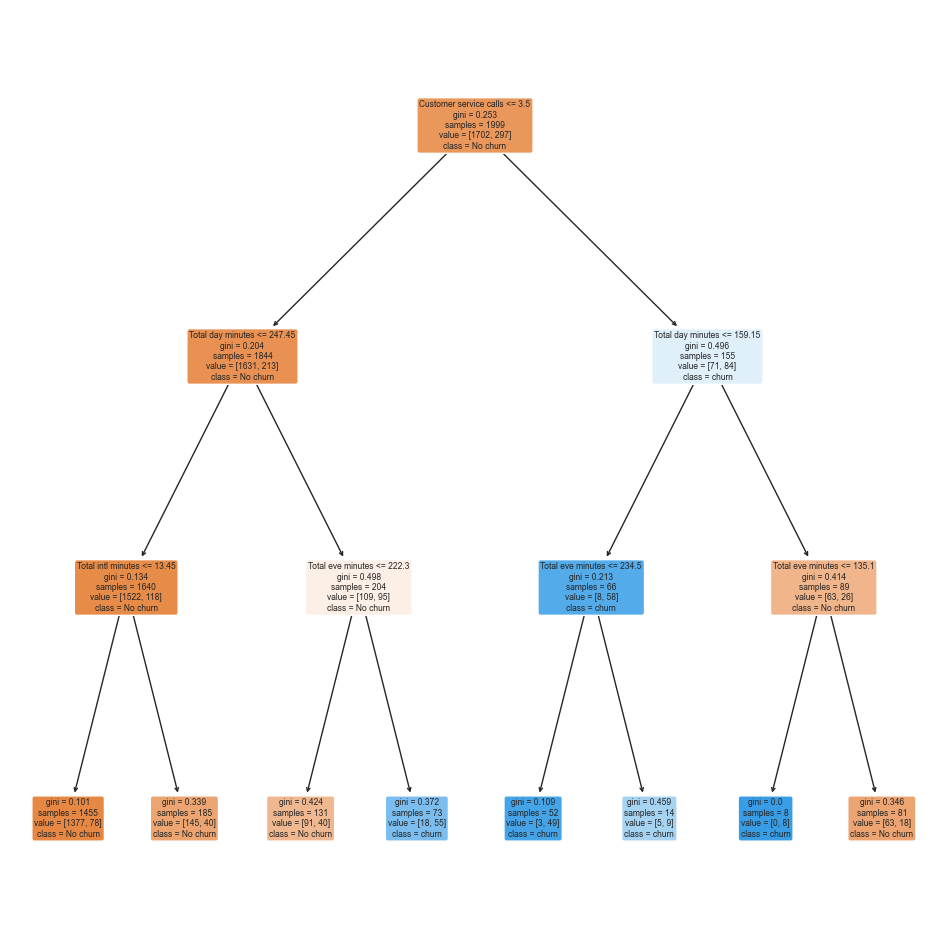

In [39]:
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(tree, filled=True, rounded=True, 
          feature_names=list(trainDF.columns), 
          class_names=["No churn","churn"])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8989494747373686

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8800599700149925



<Axes: >

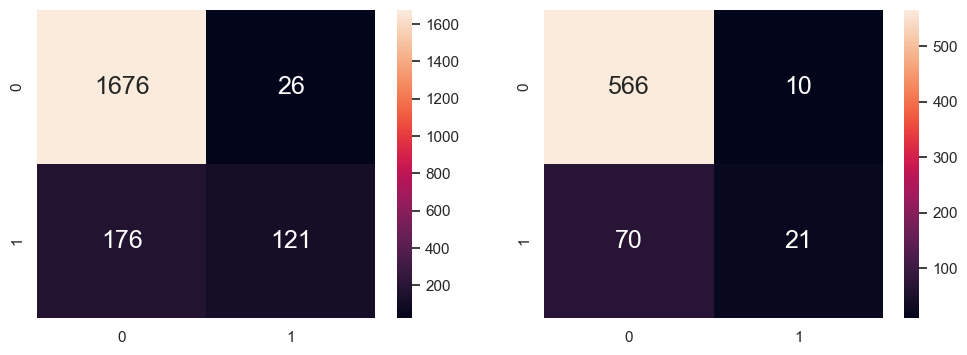

In [40]:
# Predict Legendary values corresponding to Total
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", tree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", tree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])